In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = "serif"
#plt.rcParams['font.serif'] = "cm"

import numpy as np
from sympy import solve, Matrix, symbols, Eq,latex,simplify,sqrt
from ipywidgets import interact, interactive,FloatSlider,IntSlider,ToggleButton
e,c,d,b,K,a,r,x,y=symbols('e c d b K a r x y')
from rmModel_py3 import rmModel,Es_normal
Es_normal['rhs']='RM'
m = rmModel(Es=Es_normal,Ps='auto/rm_set1.hdf5',Vs=None)
p=m.p.copy()

dxdt =  -c*x*y/(b + x) + r*x*(1.0 - x/K)
dydt =  c*e*x*y/(b + x) - d*y
Local Jacobian: Matrix([[c*x*y/(b + x)**2 - c*y/(b + x) + r*(1.0 - x/K) - r*x/K, -c*x/(b + x)], [-c*e*x*y/(b + x)**2 + c*e*y/(b + x), c*e*x/(b + x) - d]])
Time to setup:  8.851412773132324


In [2]:
jac=m.sym_localJac.subs(a,0)
dxdt=m.dxdt_eq
dydt=m.dydt_eq
print('\\frac{dx}{dt}=',latex(dxdt))
print('\\frac{dy}{dt}=',latex(dydt.subs(a,0)))

\frac{dx}{dt}= - \frac{c x y}{b + x} + r x \left(1.0 - \frac{x}{K}\right)
\frac{dy}{dt}= \frac{c e x y}{b + x} - d y


\begin{align}
\frac{dx}{dt}&= r x \left(1.0 - \frac{x}{K}\right)-\frac{c x y}{b + x}  \\
\frac{dy}{dt}&= e(1+a\sin(2 \pi t))\frac{ c x y}{b + x} - d y
\end{align}

In [3]:
xs=b*d/(e*c-d)
ys=solve(Eq(dxdt/x,0),y)[0].subs(x,xs)

In [4]:
print(xs,",",ys)

b*d/(c*e - d) , r*(K - b*d/(c*e - d))*(b*d/(c*e - d) + b)/(K*c)


In [5]:
jac_s=jac.subs([(x,xs),(y,ys)])
jac_s_e = jac_s.subs([(c,p['c']),(d,p['d']),(b,p['b']),(K,p['K']),(r,p['r'])])

In [6]:
print(simplify(jac_s.eigenvals()))

{-d*r*(-K*c*e + K*d + b*c*e + b*d)/(2*K*c*e*(c*e - d)) - sqrt(d*r*(-4*K**2*c**4*e**4 + 12*K**2*c**3*d*e**3 - 12*K**2*c**2*d**2*e**2 + K**2*c**2*d*e**2*r + 4*K**2*c*d**3*e - 2*K**2*c*d**2*e*r + K**2*d**3*r + 4*K*b*c**3*d*e**3 - 8*K*b*c**2*d**2*e**2 - 2*K*b*c**2*d*e**2*r + 4*K*b*c*d**3*e + 2*K*b*d**3*r + b**2*c**2*d*e**2*r + 2*b**2*c*d**2*e*r + b**2*d**3*r))/(2*K*c*e*(c*e - d)): 1, -d*r*(-K*c*e + K*d + b*c*e + b*d)/(2*K*c*e*(c*e - d)) + sqrt(d*r*(-4*K**2*c**4*e**4 + 12*K**2*c**3*d*e**3 - 12*K**2*c**2*d**2*e**2 + K**2*c**2*d*e**2*r + 4*K**2*c*d**3*e - 2*K**2*c*d**2*e*r + K**2*d**3*r + 4*K*b*c**3*d*e**3 - 8*K*b*c**2*d**2*e**2 - 2*K*b*c**2*d*e**2*r + 4*K*b*c*d**3*e + 2*K*b*d**3*r + b**2*c**2*d*e**2*r + 2*b**2*c*d**2*e*r + b**2*d**3*r))/(2*K*c*e*(c*e - d)): 1}


In [7]:
real_eigval = simplify(-d*r*(-K*c*e + K*d + b*c*e + b*d)/(2*K*c*e*(c*e - d)))
print(real_eigval)
print(solve(Eq(real_eigval,0),e)[0].subs([(c,p['c']),(d,p['d']),(b,p['b']),(K,p['K']),(r,p['r'])]).evalf())

-d*r*(-K*c*e + K*d + b*c*e + b*d)/(2*K*c*e*(c*e - d))
0.928571428571429


In [8]:
diff_real_eigval = real_eigval.diff(e)
print(solve(Eq(diff_real_eigval,0),e)[0].subs([(c,p['c']),(d,p['d']),(b,p['b']),(K,p['K']),(r,p['r'])]).evalf())

0.297731366690868


In [9]:
#def print_eigvals(e_num):
#    g=jac_s_e.subs(e,e_num)
#    print(np.linalg.eigvals(np.array(g).astype(np.complex64)))
    

#e_w = FloatSlider(min=0.0,max=2.0,step=0.01,value=1.0)
#interact(print_eigvals,e_num=e_w)

In [12]:
e_range = np.linspace(0.6,1.0,100)
real_eigs = np.zeros_like(e_range)
imag_eigs = np.zeros_like(e_range)
for i,e_i in enumerate(e_range):
    g=jac_s_e.subs(e,e_i)
    #print(np.array(g))
    eigs = np.linalg.eigvals(np.array(g).astype(np.complex64))
    arg_max  = np.argmax(np.real(eigs))
    real_eigs[i]=np.real(eigs[arg_max])
    imag_eigs[i]=np.imag(eigs[arg_max])
#print(real_eigs)
#print(imag_eigs)

(0.6, 1.0)

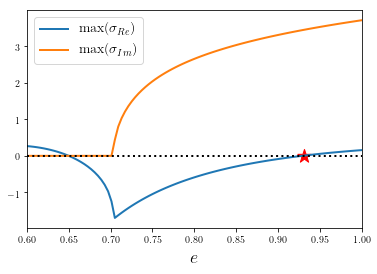

In [14]:
plt.plot(e_range,real_eigs,label=r'$\max(\sigma_{Re})$')
plt.plot(e_range,imag_eigs,label=r'$\max(\sigma_{Im})$')
plt.plot(e_range,np.zeros_like(e_range),'k:')
hopf_instability = np.amin(np.where(real_eigs[np.amin(np.where(imag_eigs>0)):]>=0))+np.amin(np.where(imag_eigs>0))
plt.scatter(e_range[hopf_instability],0,s=200,marker="*",c='r')
plt.xlabel(r'$e$')
plt.legend(loc='best')
plt.xlim([e_range[0],e_range[-1]])